### Insurance Premium prediction 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Ranjit-Singh-786/insorance-Premium-Prediction/master/insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
df['charges'].mean()

13270.422265141257

In [10]:
## find out the average charges of male and female 
# population data and sample data 
male=df[df["sex"]=='male']
female=df[df["sex"]=='female']



print("Male condidate average : ",male['charges'].mean())
print("Female condidate average : ",female['charges'].mean())

Male condidate average :  13956.751177721893
Female condidate average :  12569.578843835347


In [11]:
female['charges'].mean()

12569.578843835347

In [12]:
df2 = female[female['charges']<= female['charges'].mean()]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [13]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [14]:
df2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [15]:
df2['region'].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [16]:
# feature engineering  
# < 18.5   ==> underweight 
# 18.5 to 24.  ==> HealthyWeight 
# 25.0 to 29.9  ==> overweight

## underweight , HealthyWeight , overweight

# new_column

In [17]:
type(df['bmi'])

pandas.core.series.Series

In [18]:
ls = list(df['bmi'])

In [19]:
# ls 

In [20]:
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [21]:
len(label)

1338

In [22]:
df.shape 

(1338, 7)

In [23]:
df['health_category'] = label

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [25]:
df['health_category'].value_counts()
# groupby  

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [26]:
# average charges of each and every health class 

# min , max , mean , charges 

In [27]:
health_group = df.groupby('health_category')

In [28]:
health_group[['charges']].mean() 

,charges
health_category,
HealthyWeight,10404.900084
Overweight,11020.183782
Underweight,8852.200585
obese,15420.399577


In [29]:
health_analysis = health_group['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')

In [30]:
health_analysis.sort_values('mean_charges')  # ascending order 

,min_charges,max_charges,mean_charges
health_category,,,
Underweight,1621.3402,32734.18630,8852.200585
HealthyWeight,1121.8739,35069.37452,10404.900084
Overweight,1252.4070,38245.59327,11020.183782
obese,1131.5066,63770.42801,15420.399577


In [31]:
health_classes = list(health_analysis.index)

In [32]:
average_charges = (health_analysis['mean_charges'].values)

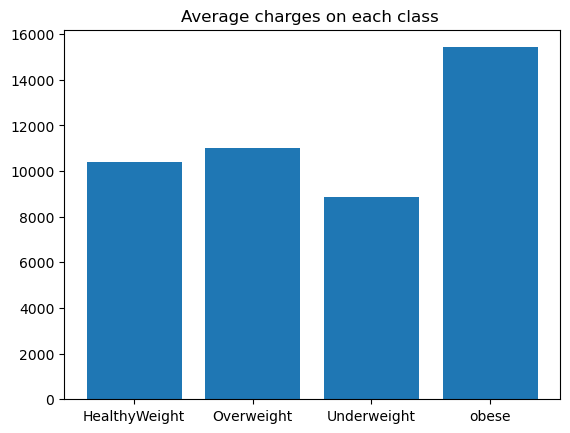

In [33]:
plt.bar(health_classes,average_charges)
plt.title('Average charges on each class ')
plt.show()

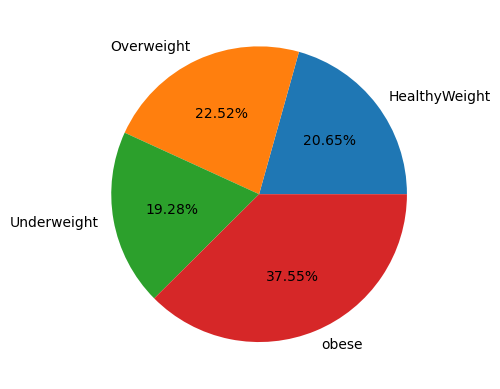

In [34]:
avg=list(health_analysis['max_charges'].values)
classes=list(health_analysis['max_charges'].index)
plt.pie(avg,labels=classes,autopct="%.2f%%")
plt.show() 

In [35]:
# gender = one hot encode
gender_dict = {'female':0,'male':1}
smoker_dict = {'yes':1,'no':0}
df['sex'] = df['sex'].map(gender_dict)
df['smoker'] = df['smoker'].map(smoker_dict)

In [36]:
df.health_category

0          Overweight
1               obese
2               obese
3       HealthyWeight
4          Overweight
            ...      
1333            obese
1334            obese
1335            obese
1336       Overweight
1337       Overweight
Name: health_category, Length: 1338, dtype: object

In [37]:
list(df.health_category.value_counts().keys())

['obese', 'Overweight', 'HealthyWeight', 'Underweight']

In [38]:
df.health_category.value_counts

<bound method IndexOpsMixin.value_counts of 0          Overweight
1               obese
2               obese
3       HealthyWeight
4          Overweight
            ...      
1333            obese
1334            obese
1335            obese
1336       Overweight
1337       Overweight
Name: health_category, Length: 1338, dtype: object>

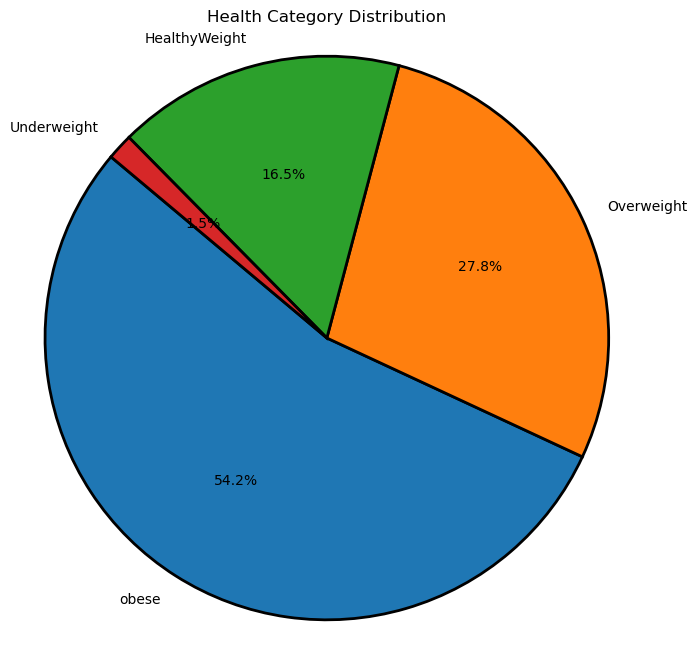

In [40]:
value_counts = df['health_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,wedgeprops={'ec':'k','lw':2})
plt.title('Health Category Distribution')
plt.axis('equal')
plt.show()

In [41]:
df['health_category'].value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [42]:
health_category_dict = {'Underweight':1,'HealthyWeight':2,'Overweight':3,'obese':4}
df['health_category'].map(health_category_dict)

0       3
1       4
2       4
3       2
4       3
       ..
1333    4
1334    4
1335    4
1336    3
1337    3
Name: health_category, Length: 1338, dtype: int64

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,Overweight
1,18,1,33.770,1,0,southeast,1725.55230,obese
2,28,1,33.000,3,0,southeast,4449.46200,obese
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight
4,32,1,28.880,0,0,northwest,3866.85520,Overweight


In [44]:
#region
pd.get_dummies(df)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,health_category_HealthyWeight,health_category_Overweight,health_category_Underweight,health_category_obese
0,19,0,27.900,0,1,16884.92400,False,False,False,True,False,True,False,False
1,18,1,33.770,1,0,1725.55230,False,False,True,False,False,False,False,True
2,28,1,33.000,3,0,4449.46200,False,False,True,False,False,False,False,True
3,33,1,22.705,0,0,21984.47061,False,True,False,False,True,False,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False,False,False,False,True
1334,18,0,31.920,0,0,2205.98080,True,False,False,False,False,False,False,True
1335,18,0,36.850,0,0,1629.83350,False,False,True,False,False,False,False,True
1336,21,0,25.800,0,0,2007.94500,False,False,False,True,False,True,False,False


In [45]:
final_data = pd.get_dummies(df).astype(int)

In [46]:
final_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,health_category_HealthyWeight,health_category_Overweight,health_category_Underweight,health_category_obese
0,19,0,27,0,1,16884,0,0,0,1,0,1,0,0
1,18,1,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,1,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,1,22,0,0,21984,0,1,0,0,1,0,0,0
4,32,1,28,0,0,3866,0,1,0,0,0,1,0,0


In [47]:
# x and y split
x = final_data.drop('charges',axis = 'columns')
y = final_data['charges']

In [48]:
#training and testing split, test_size = 0.2

In [49]:
#### training testing split 
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.2)  # 20% testing 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [52]:
# object creation
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdmfr = RandomForestRegressor()

In [53]:
x_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,health_category_HealthyWeight,health_category_Overweight,health_category_Underweight,health_category_obese
863,36,0,19,0,0,1,0,0,0,1,0,0,0
1201,46,1,40,2,0,0,1,0,0,0,0,0,1
79,41,0,32,0,0,0,1,0,0,0,0,0,1
430,19,1,33,0,0,0,0,0,1,0,0,0,1
1127,35,0,35,2,0,0,0,1,0,0,0,0,1


In [54]:
# # model testing or model evaluation phase   
# print("Training score : ",lnr.score(x_train,y_train)*100)
# print("Testing score : ",lnr.score(x_test,y_test)*100) 

In [55]:
class Linar:
    def __init__(self,a,b):
        pass

In [56]:
lnr.fit(x_train,y_train) 
dtr.fit(x_train,y_train) 
rdmfr.fit(x_train,y_train) 

RandomForestRegressor()

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,health_category_HealthyWeight,health_category_Overweight,health_category_Underweight,health_category_obese
863,36,0,19,0,0,1,0,0,0,1,0,0,0
1201,46,1,40,2,0,0,1,0,0,0,0,0,1
79,41,0,32,0,0,0,1,0,0,0,0,0,1
430,19,1,33,0,0,0,0,0,1,0,0,0,1
1127,35,0,35,2,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,35,1,27,2,1,1,0,0,0,0,1,0,0
1236,63,0,21,0,0,1,0,0,0,1,0,0,0
841,59,1,24,0,0,1,0,0,0,1,0,0,0
892,54,1,24,0,0,1,0,0,0,1,0,0,0


In [60]:
# model evalution
print("trainig score by Linear: " , lnr.score(x_train,y_train)*100 )
print("trainig score by DecisionTree: " ,dtr.score(x_train,y_train)*100 )
print("trainig score by RandomForest: " ,rdmfr.score(x_train,y_train) *100)

trainig score by Linear:  76.40358783772483
trainig score by DecisionTree:  99.90980492035251
trainig score by RandomForest:  97.67659257281349


In [61]:
# model evalution
print("testing score by Linear: " , lnr.score(x_test,y_test)*100 )
print("testing score by DecisionTree: " ,dtr.score(x_test,y_test)*100 )
print("testing score by RandomForest: " ,rdmfr.score(x_test,y_test) *100)

testing score by Linear:  71.48778957041297
testing score by DecisionTree:  70.442991489487
testing score by RandomForest:  81.86254725117247


In [62]:
# prediction
prediction_tree = lnr.predict(x_test)
prediction_decisiontree = dtr.predict(x_test)
prediction_randomforest = rdmfr.predict(x_test)

In [63]:
comparison_df = pd.concat([x_test,y_test], axis = 1)
comparison_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,health_category_HealthyWeight,health_category_Overweight,health_category_Underweight,health_category_obese,charges
551,32,0,28,0,0,0,0,1,0,0,1,0,0,3972
456,55,0,30,2,0,0,0,1,0,0,0,0,1,11881
1252,20,1,27,0,1,0,0,0,1,0,1,0,0,16232
783,50,0,27,1,1,0,0,0,1,0,1,0,0,24520
585,33,0,28,1,0,0,0,1,0,0,1,0,0,4779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,55,0,29,0,0,1,0,0,0,0,1,0,0,11286
177,54,1,29,1,0,0,0,0,1,0,1,0,0,10436
369,18,1,30,3,0,1,0,0,0,0,0,0,1,3481
129,38,1,34,2,0,0,0,0,1,0,0,0,1,6082
